Forecasting H1N1 vaccine Uptake: A Data-Driven Approach


1. BUSINESS UNDERSTANDING

Overview

Vaccination is a crucial public health measure that plays a significant role in combating infectious diseases. By providing immunization to individuals, vaccines help to reduce the spread of diseases, and when a substantial portion of a community is immunized, herd immunity can be achieved, further curbing the spread. This challenge focuses on predicting whether individuals received the H1N1 and seasonal flu vaccines based on their background information, opinions, and health behaviors.

In this context, we revisit the public health response to the H1N1 influenza pandemic that emerged in spring 2009. Known as "swine flu," this virus led to a significant global health crisis, with estimated deaths ranging between 151,000 and 575,000 in the first year. A vaccine for the H1N1 virus became publicly available in October 2009, and in the subsequent months, the United States conducted the National 2009 H1N1 Flu Survey. This survey, conducted via phone, gathered data on whether respondents had received the H1N1 and seasonal flu vaccines, alongside additional questions about their socio-economic and demographic backgrounds, opinions on illness risks and vaccine effectiveness, and their behaviors aimed at mitigating transmission. Understanding the relationship between these factors and vaccination patterns can provide valuable insights for future public health initiatives.

Challenges

The key challenges in this analysis include:

Data Quality and Completeness: Ensuring that the data used is clean, with missing values appropriately handled.
Model Selection: Identifying the most suitable machine learning models that can accurately predict vaccine uptake.
Feature Importance: Determining which factors most significantly influence vaccination decisions.
Model Generalizability: Ensuring that the models developed can generalize well to new, unseen data.

Proposed Solution

To address these challenges, we propose the development of multiple machine learning models, including Decision Tree Classifier, Logistic Regression, Random Forest, K-Nearest Neighbor Classifier, and Gradient Boosting Classifier. The performance of these models will be evaluated based on accuracy, with a target accuracy score of 80%. Additionally, we will employ hyperparameter tuning to optimize model performance, particularly focusing on the Gradient Boosting Classifier, which showed promising results.

By leveraging machine learning techniques, this analysis aims to predict H1N1 vaccine uptake with high accuracy and identify key factors influencing vaccination decisions. The insights gained will be valuable for public health professionals and policymakers in designing targeted interventions to improve vaccination rates and manage future pandemics more effectively.

Problem Statement

The primary objective of this analysis is to predict individuals' H1N1 vaccine uptake using data from the National 2009 H1N1 Flu Survey, which includes respondents' demographic, socio-economic, and attitudinal information. This challenge involves developing and evaluating various machine learning models to accurately forecast vaccine uptake. Additionally, it aims to identify the most influential factors affecting vaccination decisions, such as doctor recommendations, health insurance coverage, and perceptions of vaccine effectiveness and risks. By analyzing these predictive models, we seek to extract actionable insights that can help public health professionals and policymakers enhance vaccination rates and improve strategies for future vaccination campaigns.

Objectives

1. To create a model that assess feature importance within the dataset, helping identify key factors to emphasize when promoting vaccination.

2. To determine the most influential factors affecting H1N1 vaccine acceptance, including doctor recommendations, perceptions of vaccine effectiveness, and risk perceptions related to H1N1.

3. To assess the performance of different machine learning algorithms, including Decision Tree Classifier, Logistic Regression, Random Forest, K-Nearest Neighborhood Classifier, and Gradient Boosting Classifier in predicting H1N1 vaccine uptake.

4. To analyze the implications of the predictive models and identify actionable insights for public health professionals and policymakers to improve vaccination rates.



2. DATA UNDERSTANDING

The dataset utilized in this project comprises 38 columns and 26,708 rows, sourced from Kaggle. This dataset originates from the National Flu Survey (NHFS) of 2009, a comprehensive survey conducted to understand public attitudes and behaviors regarding influenza vaccination, specifically targeting the H1N1 flu vaccine.

The column names and their descriptions are as follows:

respondent_id: Unique identifier for each survey respondent.

h1n1_concern: Level of concern about the H1N1 flu.

h1n1_knowledge: Knowledge level about the H1N1 flu.

behavioral_antiviral_meds: Behavior related to taking antiviral medications.

behavioral_avoidance: Behavior related to avoiding people with flu-like symptoms.

behavioral_face_mask: Behavior related to wearing a face mask.

behavioral_wash_hands: Behavior related to washing hands frequently.

behavioral_large_gatherings: Behavior related to avoiding large gatherings.

behavioral_outside_home: Behavior related to going outside the home less frequently

behavioral_touch_face: Behavior related to touching the face.

doctor_recc_h1n1: Whether a doctor recommended the H1N1 vaccine.

doctor_recc_seasonal: Whether a doctor recommended the seasonal flu vaccine.

chronic_med_condition: Whether the respondent has a chronic medical condition.

child_under_6_months: Whether the respondent has a child under 6 months old.

health_worker: Whether the respondent is a health worker.

health_insurance: Whether the respondent has health insurance.

opinion_h1n1_vacc_effective: Opinion on the effectiveness of the H1N1 vaccine.

opinion_h1n1_risk: Opinion on the risk of getting H1N1.

opinion_h1n1_sick_from_vacc: Opinion on the likelihood of getting sick from the H1N1 vaccine.

opinion_seas_vacc_effective: Opinion on the effectiveness of the seasonal flu vaccine.

opinion_seas_risk: Opinion on the risk of getting the seasonal flu.

opinion_seas_sick_from_vacc: Opinion on the likelihood of getting sick from the seasonal flu vaccine.

age_group: Age group of the respondent.

education: Education level of the respondent.

race: Race of the respondent.

sex: Sex of the respondent.

income_poverty: Income level relative to the poverty line.

marital_status: Marital status of the respondent.

rent_or_own: Whether the respondent rents or owns their home.

employment_status: Employment status of the respondent.

hhs_geo_region: Health and Human Services (HHS) region of the respondent.

census_msa: Metropolitan Statistical Area (MSA) status.

household_adults: Number of adults in the household.

household_children: Number of children in the household.

employment_industry: Industry in which the respondent is employed.

employment_occupation: Occupation of the respondent.

h1n1_vaccine: Whether the respondent received the H1N1 vaccine.

seasonal_vaccine: Whether the respondent received the seasonal flu vaccine.

2.1 Importing Necessary Libraries

In [194]:
import pandas as pd
import numpy as np
from io import StringIO
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import recall_score, precision_score ,accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
import joblib



2.2 Loading the Dataset

In [195]:
import io
def load_data(data):
    # Load the dataset
    df = pd.read_csv("H1N1_Flu_Vaccines.csv")
    
    # Head
    head = df.head()
    
    # Shape
    shape = df.shape
   

    #Describe
    describe=df.describe(include="all")

    #Info
    buffer = io.StringIO()
    df.info(buf=buffer)
    info_str = buffer.getvalue()
    # Output dictionary
    output = {
        "Head": head,
        "Shape": shape,
        "Describe": describe,
        "Info":info_str
    }

    return output
data_summary = load_data("H1N1_Flu_Vaccines.csv")

print("Head:")
print(data_summary["Head"])
print("\nShape:")
print(data_summary["Shape"])
print("\nDescribe:")
print(data_summary["Describe"])
print("\nInfo:")
print(data_summary["Info"])


Head:
   respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0              0           1.0             0.0                        0.0   
1              1           3.0             2.0                        0.0   
2              2           1.0             1.0                        0.0   
3              3           1.0             1.0                        0.0   
4              4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0         

In [196]:
data_summary["Shape"]

(26707, 38)

In [197]:
data_summary["Describe"]

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,24665,25244,26707,26707,26458.000000,26458.000000,13377,13237,26707.000000,26707.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,3,10,3,NaN,NaN,21,23,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Own,Employed,lzgpxyit,"MSA, Not Principle City",NaN,NaN,fcxhlnwr,xtkaffoo,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18736,13560,4297,11645,NaN,NaN,2468,1778,NaN,NaN
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,NaN,NaN,NaN,NaN,0.886499,0.534583,NaN,NaN,0.212454,0.465608
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,NaN,NaN,NaN,NaN,0.753422,0.928173,NaN,NaN,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,0.000000,1.000000


In [198]:
print(data_summary["Info"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

3. DATA PREPARATION

3.1 Checking for duplicates and missing vales

In [199]:
class DataChecker:
    def __init__(self, file_path):
       
        self.df = pd.read_csv(file_path)
    
    def check_missing_values(self):
        
        missing_values = self.df.isnull().sum()
        missing_percentage = (missing_values / len(self.df)) * 100
        missing_data = pd.DataFrame({
            'Missing Values': missing_values,
            'Percentage': missing_percentage
        })
        return missing_data
    
    def check_duplicates(self):
        
        duplicate_count = self.df.duplicated().sum()
        return duplicate_count

# Example usage:
file_path = "H1N1_Flu_Vaccines.csv"
data_checker = DataChecker(file_path)

# Check for missing values
missing_values_report = data_checker.check_missing_values()
print("Missing Values Report:")
print(missing_values_report)

# Check for duplicates
duplicate_count = data_checker.check_duplicates()
print(f"Number of duplicate rows: {duplicate_count}")

Missing Values Report:
                             Missing Values  Percentage
respondent_id                             0    0.000000
h1n1_concern                             92    0.344479
h1n1_knowledge                          116    0.434343
behavioral_antiviral_meds                71    0.265848
behavioral_avoidance                    208    0.778822
behavioral_face_mask                     19    0.071142
behavioral_wash_hands                    42    0.157262
behavioral_large_gatherings              87    0.325757
behavioral_outside_home                  82    0.307036
behavioral_touch_face                   128    0.479275
doctor_recc_h1n1                       2160    8.087767
doctor_recc_seasonal                   2160    8.087767
chronic_med_condition                   971    3.635751
child_under_6_months                    820    3.070356
health_worker                           804    3.010447
health_insurance                      12274   45.957989
opinion_h1n1_vacc_effecti

3.2 Dropping columns and replacing missing values

In [200]:
data_summary["Shape"]

(26707, 38)

In [201]:
#Dropping columns with missing values with over 45% of the coumn data
#for the columns with less than 45% missing values i replaced with the mean for numeric variables and mode for non numerics
class DataChecker:
    def __init__(self, file_path):
        self.df = pd.read_csv(file_path)
    
    def check_missing_values(self):
        missing_values = self.df.isnull().sum()
        missing_percentage = (missing_values / len(self.df)) * 100
        missing_data = pd.DataFrame({
            'Missing Values': missing_values,
            'Percentage': missing_percentage
        })
        return missing_data
    
    def check_duplicates(self):
        duplicate_count = self.df.duplicated().sum()
        return duplicate_count
    
    def drop_columns(self, columns):
        self.df.drop(columns=columns, inplace=True)
    
    def replace_missing_with_mean(self):
        # Identify numeric columns
        numeric_cols = self.df.select_dtypes(include=['number']).columns
        # Replace missing values with the mean of each numeric column
        self.df[numeric_cols] = self.df[numeric_cols].apply(lambda x: x.fillna(x.mean()), axis=0)
    
    def replace_missing_with_mode(self):
        # Identify non-numeric columns
        non_numeric_cols = self.df.select_dtypes(exclude=['number']).columns
        # Replace missing values with the mode of each non-numeric column
        for col in non_numeric_cols:
            mode = self.df[col].mode()[0]
            self.df[col] = self.df[col].fillna(mode)
    
    def process_data(self, columns_to_drop):
        self.drop_columns(columns_to_drop)
        self.replace_missing_with_mean()
        self.replace_missing_with_mode()

# Example usage:
file_path = "H1N1_Flu_Vaccines.csv"
data_checker = DataChecker(file_path)

# Check for missing values before processing
missing_values_report_before = data_checker.check_missing_values()
print("Missing Values Report Before Processing:")
print(missing_values_report_before)

# Check for duplicates
duplicate_count = data_checker.check_duplicates()
print(f"Number of duplicate rows: {duplicate_count}")

# Drop specified columns and replace missing values with mean/mode
columns_to_drop = ['health_insurance', 'employment_industry', 'employment_occupation']
data_checker.process_data(columns_to_drop)

# Check for missing values after processing
missing_values_report_after = data_checker.check_missing_values()
print("Missing Values Report After Processing:")
print(missing_values_report_after)

Missing Values Report Before Processing:
                             Missing Values  Percentage
respondent_id                             0    0.000000
h1n1_concern                             92    0.344479
h1n1_knowledge                          116    0.434343
behavioral_antiviral_meds                71    0.265848
behavioral_avoidance                    208    0.778822
behavioral_face_mask                     19    0.071142
behavioral_wash_hands                    42    0.157262
behavioral_large_gatherings              87    0.325757
behavioral_outside_home                  82    0.307036
behavioral_touch_face                   128    0.479275
doctor_recc_h1n1                       2160    8.087767
doctor_recc_seasonal                   2160    8.087767
chronic_med_condition                   971    3.635751
child_under_6_months                    820    3.070356
health_worker                           804    3.010447
health_insurance                      12274   45.957989
opinion

In [202]:
class DataChecker:
    def __init__(self, file_path):
        self.df = pd.read_csv(file_path)
    
    def check_missing_values(self):
        missing_values = self.df.isnull().sum()
        missing_percentage = (missing_values / len(self.df)) * 100
        missing_data = pd.DataFrame({
            'Missing Values': missing_values,
            'Percentage': missing_percentage
        })
        return missing_data
    
    def check_duplicates(self):
        duplicate_count = self.df.duplicated().sum()
        return duplicate_count
    
    def drop_columns(self, columns):
        self.df.drop(columns=columns, inplace=True)
    
    def replace_missing_with_mean(self):
        # Identify numeric columns
        numeric_cols = self.df.select_dtypes(include=['number']).columns
        # Replace missing values with the mean of each numeric column
        self.df[numeric_cols] = self.df[numeric_cols].apply(lambda x: x.fillna(x.mean()), axis=0)
    
    def replace_missing_with_mode(self):
        # Identify non-numeric columns
        non_numeric_cols = self.df.select_dtypes(exclude=['number']).columns
        # Replace missing values with the mode of each non-numeric column
        for col in non_numeric_cols:
            mode = self.df[col].mode()[0]
            self.df[col] = self.df[col].fillna(mode)
    
    def process_data(self, columns_to_drop):
        self.drop_columns(columns_to_drop)
        self.replace_missing_with_mean()
        self.replace_missing_with_mode()

    def get_cleaned_data(self):
        return self.df.copy()

# Example usage:
file_path = "H1N1_Flu_Vaccines.csv"
data_checker = DataChecker(file_path)

# Check for missing values before processing
missing_values_report_before = data_checker.check_missing_values()
print("Missing Values Report Before Processing:")
print(missing_values_report_before)

# Check for duplicates
duplicate_count = data_checker.check_duplicates()
print(f"Number of duplicate rows: {duplicate_count}")

# Drop specified columns and replace missing values with mean/mode
columns_to_drop = ['health_insurance', 'employment_industry', 'employment_occupation']
data_checker.process_data(columns_to_drop)

# Check for missing values after processing
missing_values_report_after = data_checker.check_missing_values()
print("Missing Values Report After Processing:")
print(missing_values_report_after)

# Get the cleaned DataFrame
cleaned_df = data_checker.get_cleaned_data()

# Print the first few rows of the cleaned DataFrame
print(cleaned_df.head())

Missing Values Report Before Processing:
                             Missing Values  Percentage
respondent_id                             0    0.000000
h1n1_concern                             92    0.344479
h1n1_knowledge                          116    0.434343
behavioral_antiviral_meds                71    0.265848
behavioral_avoidance                    208    0.778822
behavioral_face_mask                     19    0.071142
behavioral_wash_hands                    42    0.157262
behavioral_large_gatherings              87    0.325757
behavioral_outside_home                  82    0.307036
behavioral_touch_face                   128    0.479275
doctor_recc_h1n1                       2160    8.087767
doctor_recc_seasonal                   2160    8.087767
chronic_med_condition                   971    3.635751
child_under_6_months                    820    3.070356
health_worker                           804    3.010447
health_insurance                      12274   45.957989
opinion

In [203]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26707 non-null  float64
 2   h1n1_knowledge               26707 non-null  float64
 3   behavioral_antiviral_meds    26707 non-null  float64
 4   behavioral_avoidance         26707 non-null  float64
 5   behavioral_face_mask         26707 non-null  float64
 6   behavioral_wash_hands        26707 non-null  float64
 7   behavioral_large_gatherings  26707 non-null  float64
 8   behavioral_outside_home      26707 non-null  float64
 9   behavioral_touch_face        26707 non-null  float64
 10  doctor_recc_h1n1             26707 non-null  float64
 11  doctor_recc_seasonal         26707 non-null  float64
 12  chronic_med_condition        26707 non-null  float64
 13  child_under_6_mo

In [204]:
cleaned_df.shape

(26707, 35)

4. EXPLORATORY DATA ANALYSIS

In [205]:
print(cleaned_df.dtypes)

# Unique values in each column
for column in cleaned_df.select_dtypes(include=['object']).columns:
    print(f"{column}: {cleaned_df[column].unique()}")

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

In [206]:
#dropping the seasonal vaccine so i can focus on the H1N1 vaccine as the target variable
new_df=cleaned_df.drop(['seasonal_vaccine',"respondent_id"], axis=1)
new_df.shape

(26707, 33)

4.1 Univariate Analysis

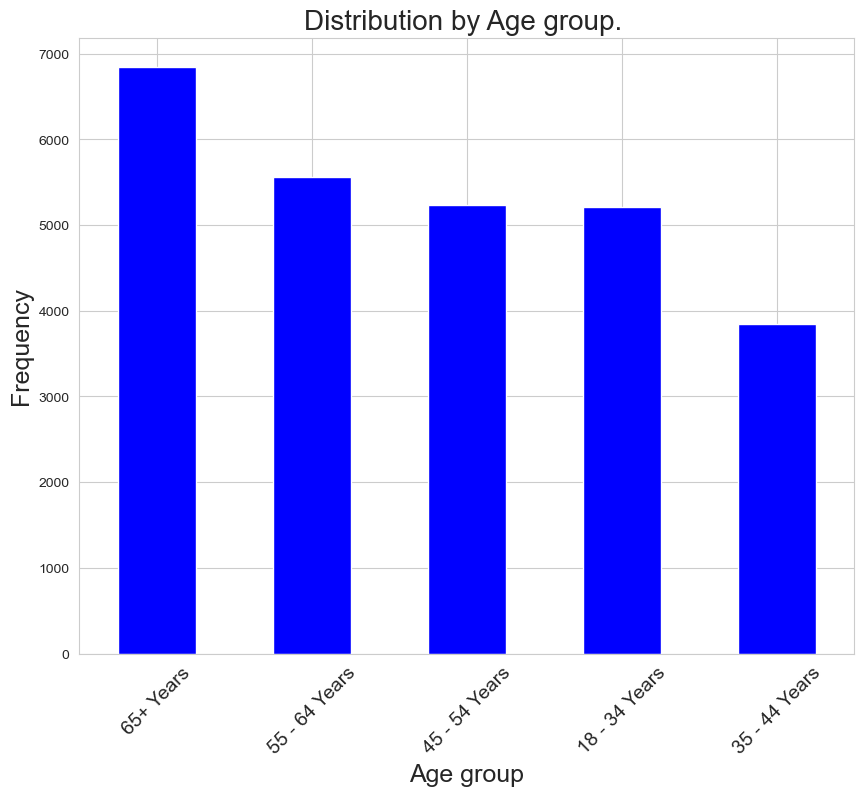

In [207]:
def bar(counter, xlabel):

  sns.set_style('whitegrid')
  ax= plt.subplots(figsize= (10, 8))
  ax= counter.value_counts().plot.bar(color = 'blue')
  ax.set_ylabel('Frequency', fontdict={'size': 18})
  ax.set_xlabel(f"{xlabel}", fontsize= 18)
  plt.xticks(rotation= 45, fontsize= 14)
  ax.set_title(f"Distribution by {xlabel}. " , fontsize= 20)
  plt.show()

bar(cleaned_df['age_group'], "Age group")

The plot displays the distribution of respondents' age groups, showing that the majority of respondents fall into the '65+ Years' category, with 6843 respondents. Following that, '55 - 64 Years' has the second-largest representation with 5563 respondents. '45 - 54 Years' and '18 - 34 Years' are close in count, with 5238 and 5215 respondents, respectively. '35 - 44 Years' has the fewest respondents at 3848, making it the smallest age group category.

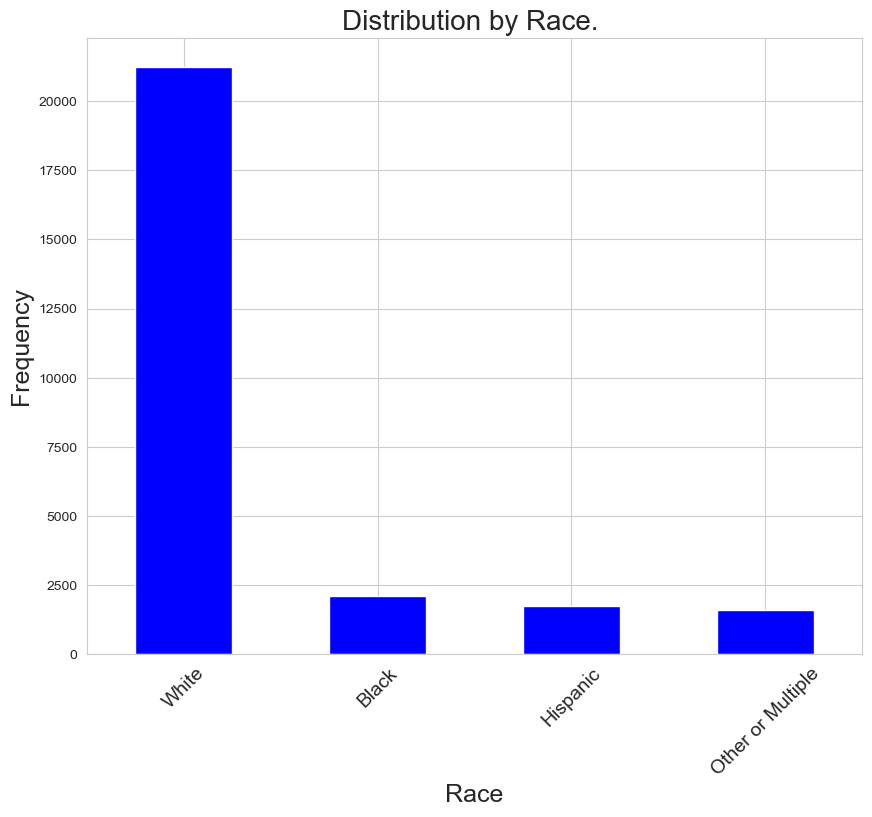

In [208]:
bar(cleaned_df['race'], "Race")


The survey results show a majority White population (21,222) with representation from Black (2,118), Hispanic (1,755), and Other/Multiple (1,612) respondents.

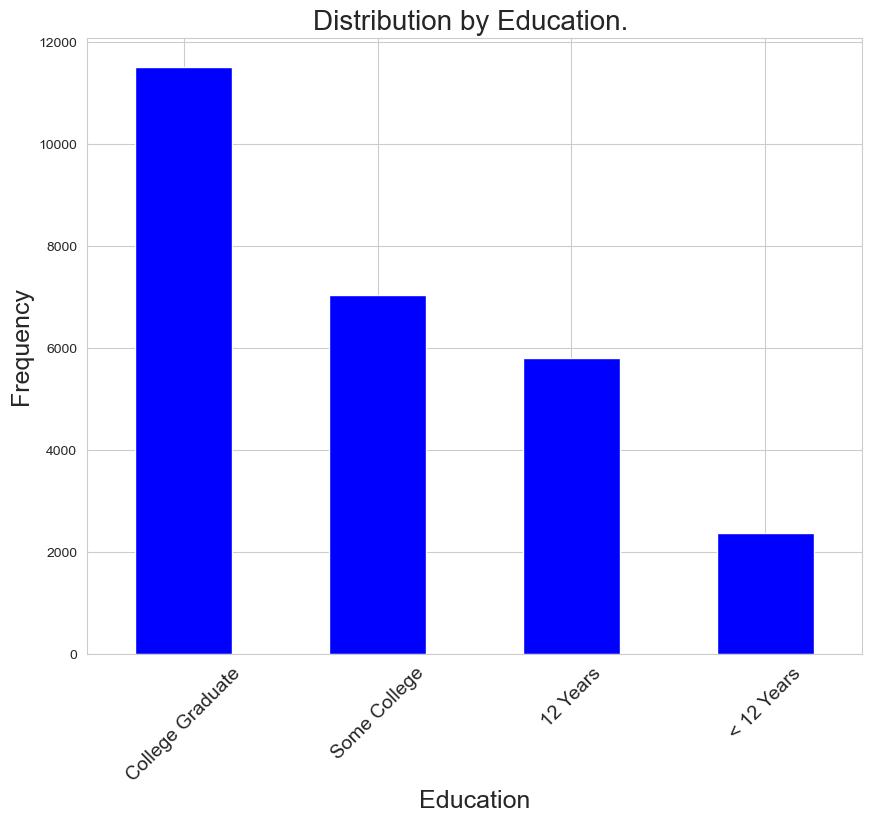

In [209]:
bar(cleaned_df['education'], "Education")


The plot illustrates the educational distribution of respondents, with the highest count in the 'College Graduate' category, consisting of 11,504 individuals. 'Some College' follows as the second-largest group with 7,043 respondents. '12 Years' and '< 12 Years' have 5,797 and 2,363 respondents, respectively. This distribution provides insights into the educational background of the surveyed population, with 'College Graduate' being the most prevalent category.

4.2 Bivariate Analysis

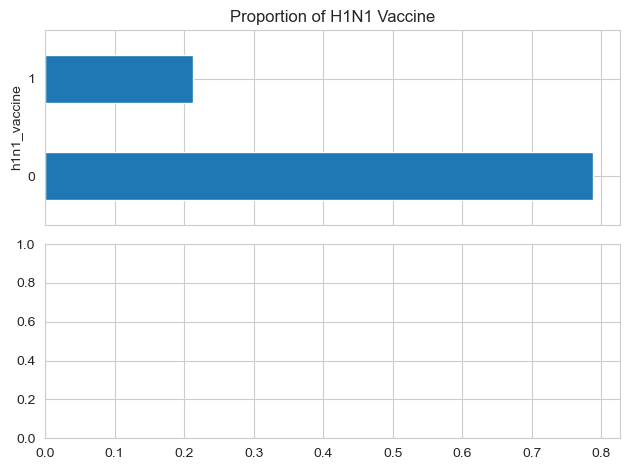

In [210]:
fig, ax = plt.subplots(2, 1, sharex=True)

n_obs = cleaned_df.shape[0]

(cleaned_df['h1n1_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of H1N1 Vaccine", ax=ax[0])
)
ax[0].set_ylabel("h1n1_vaccine")


fig.tight_layout()

The plots illustrate the distribution of respondents' vaccination statuses for H1N1 vaccine.'0' represents those who have not been vaccinated, accounting for 21,033 respondents, while '1' represents those who have been vaccinated, totaling 5,674 respondents. This distribution highlights that a majority of respondents in the dataset have not been vaccinated against H1N1.



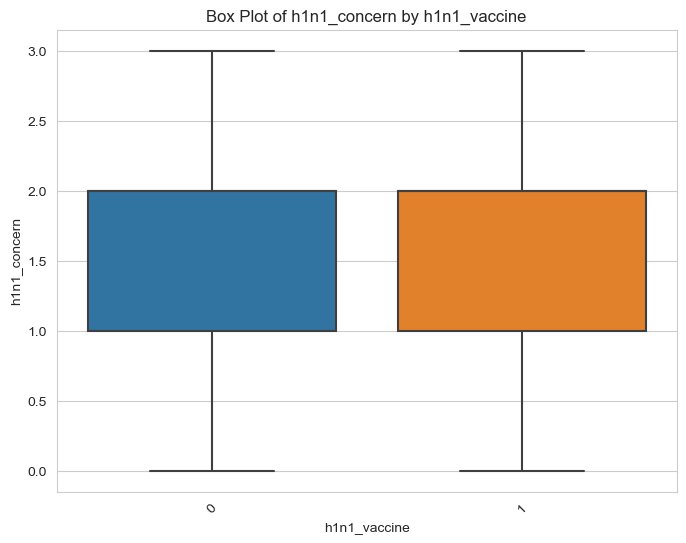

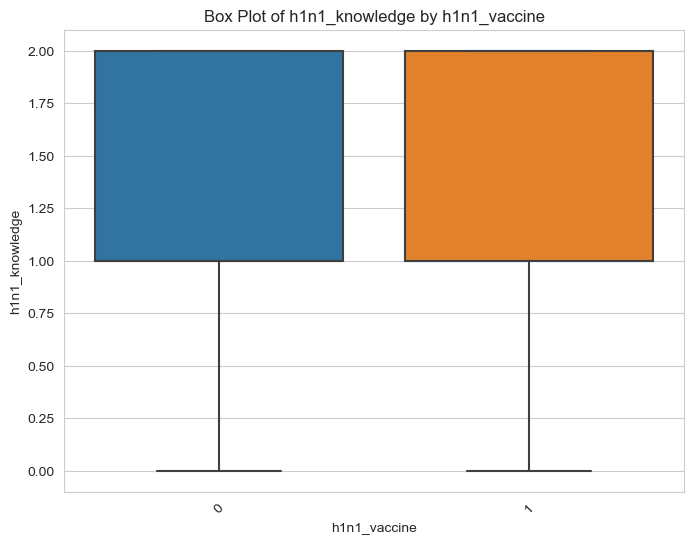

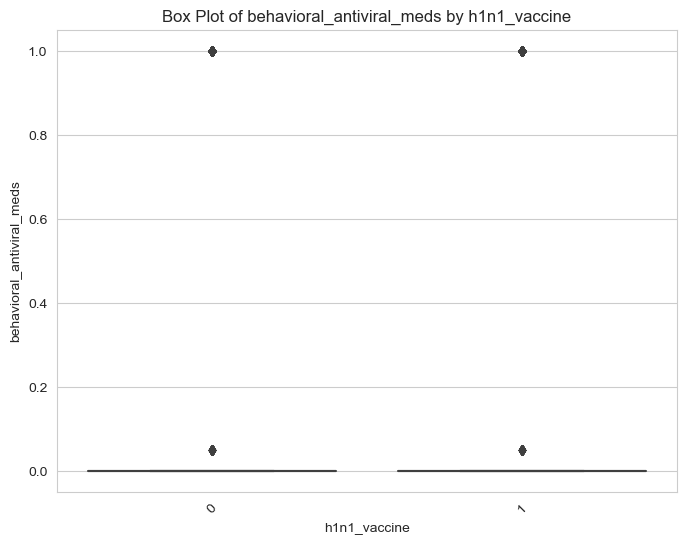

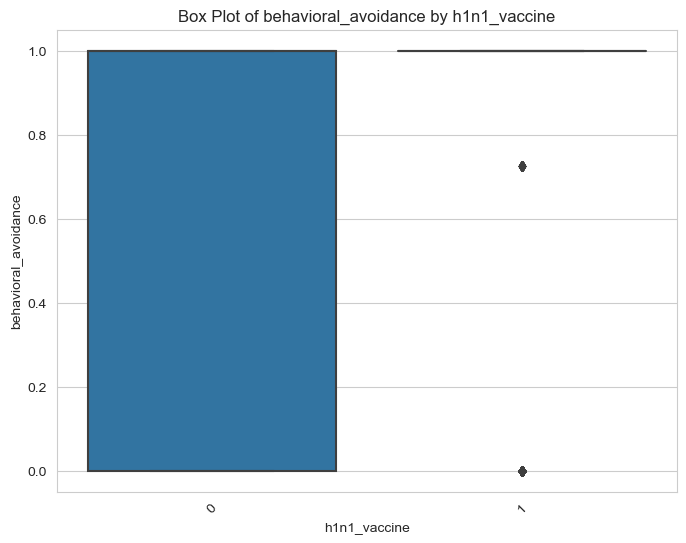

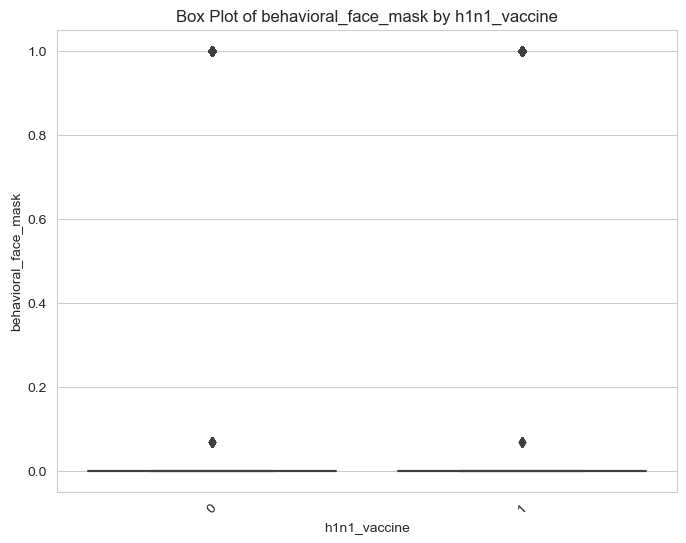

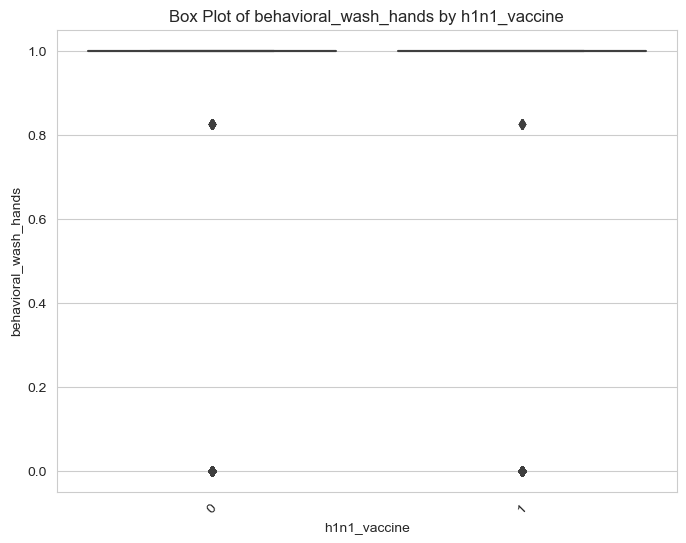

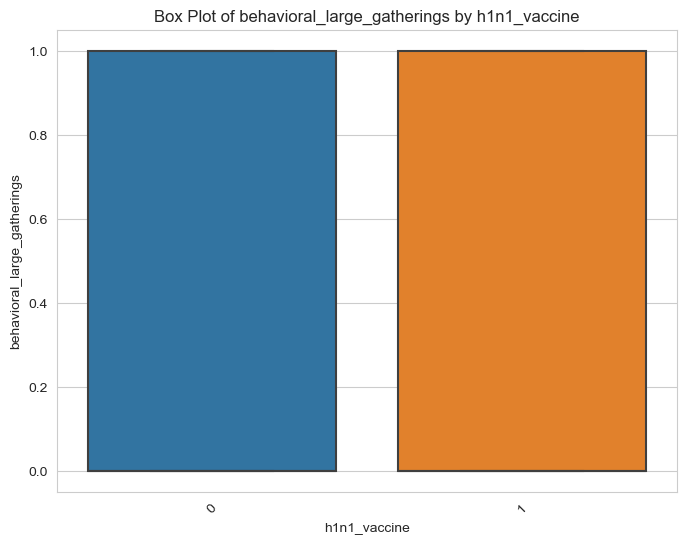

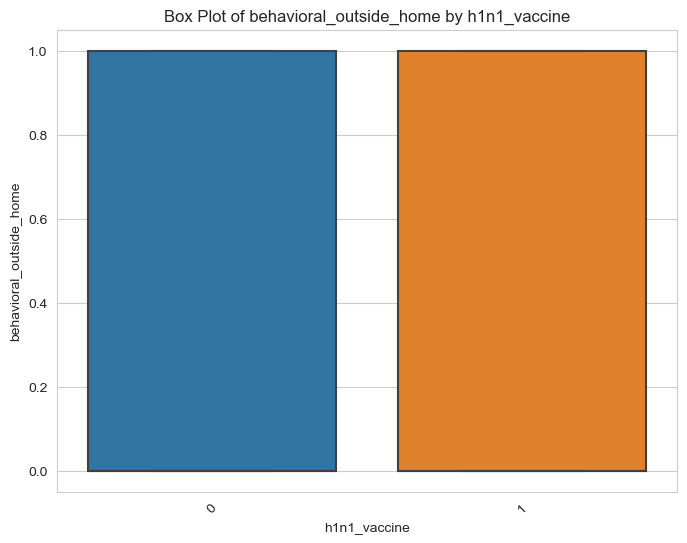

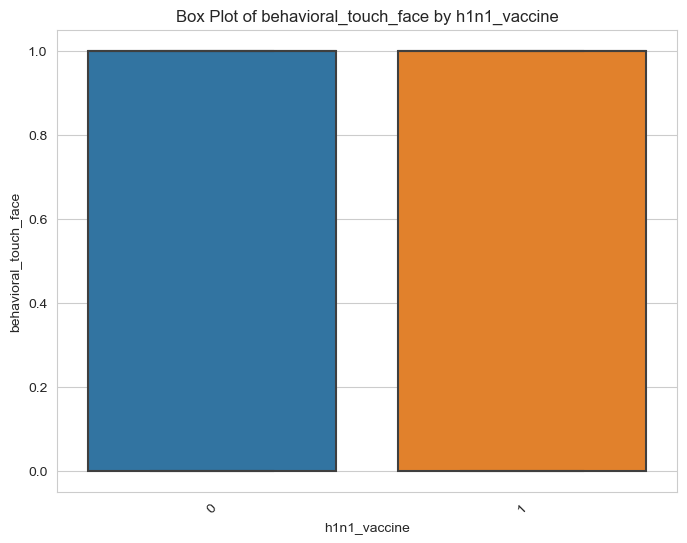

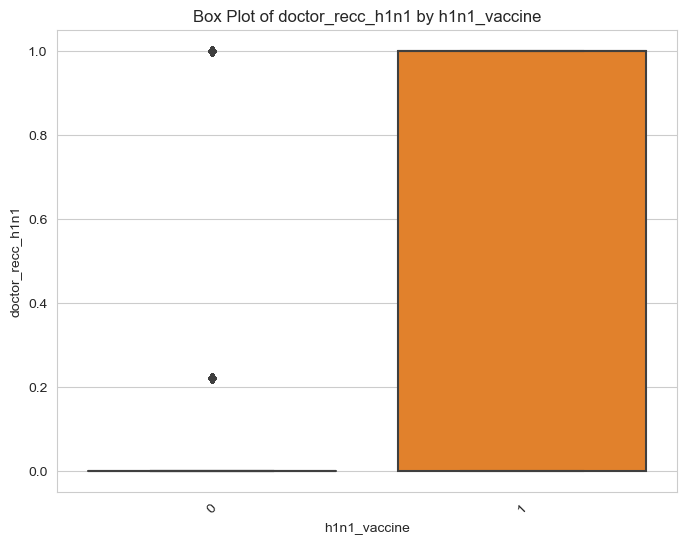

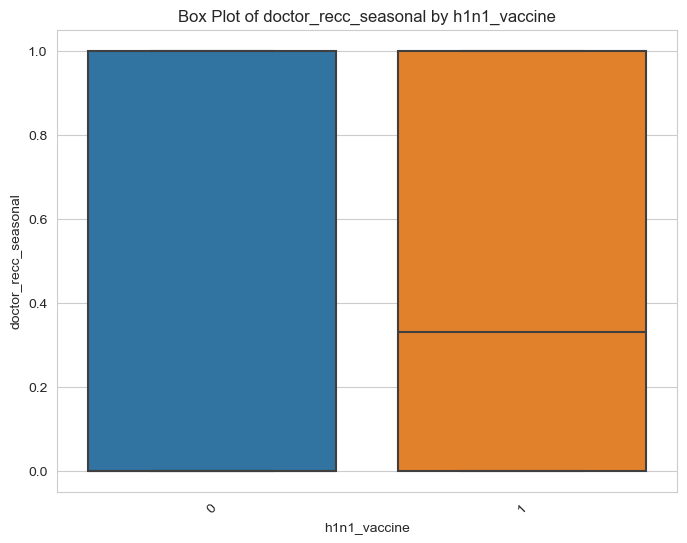

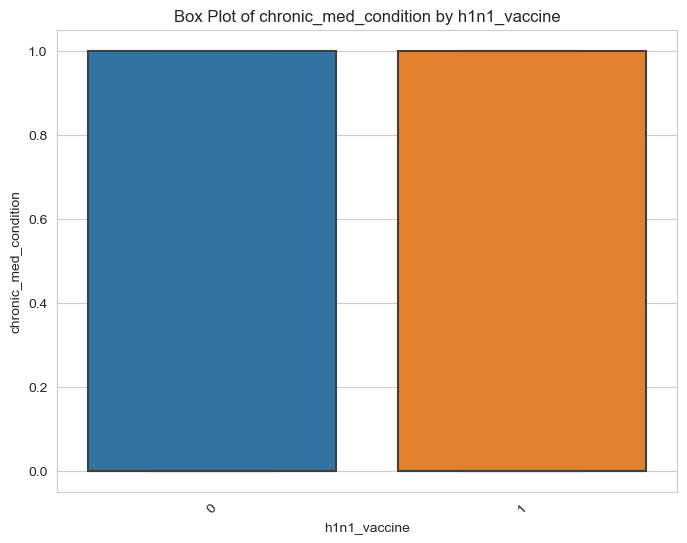

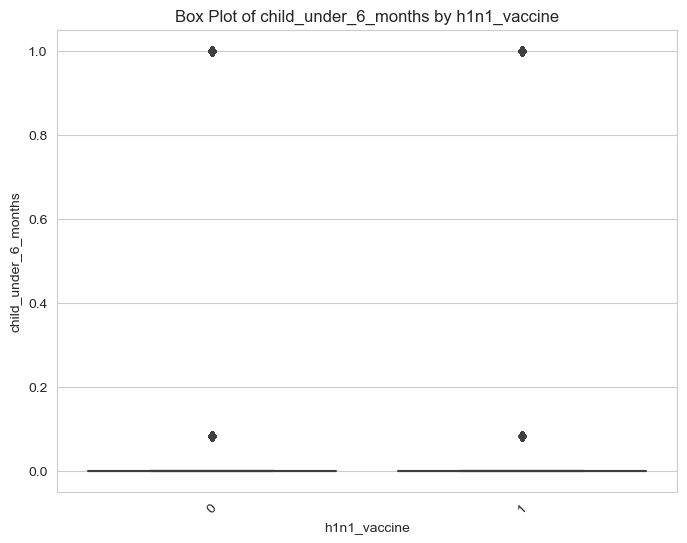

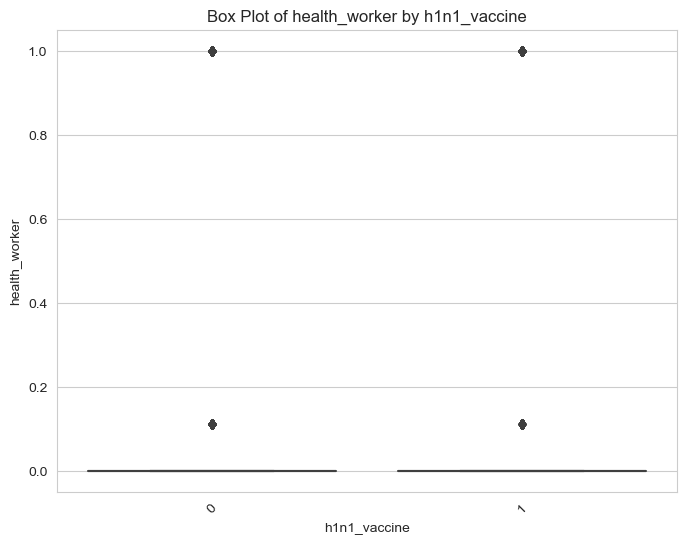

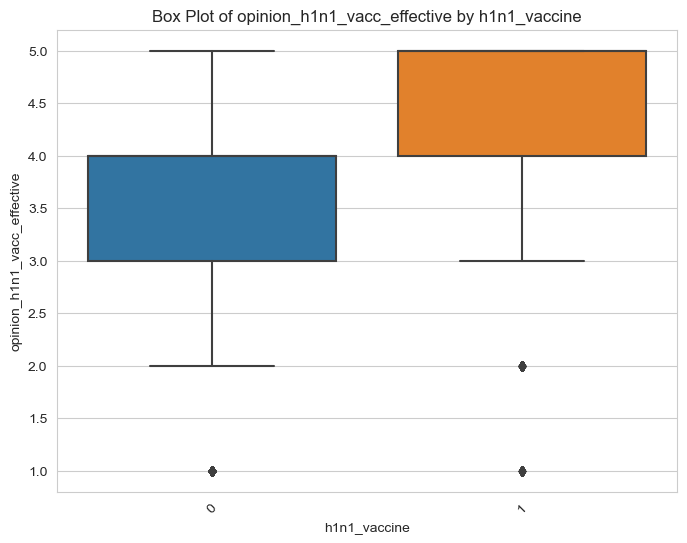

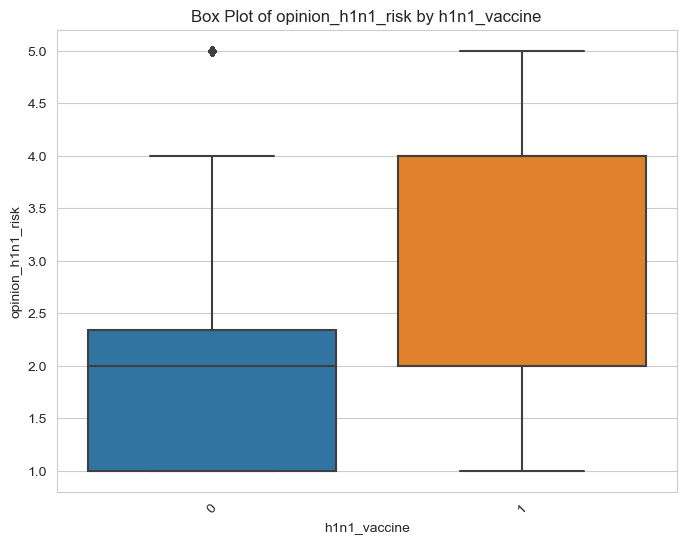

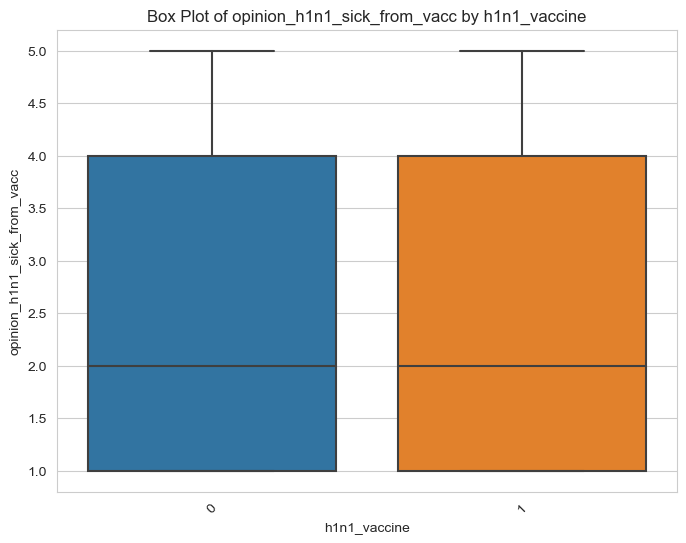

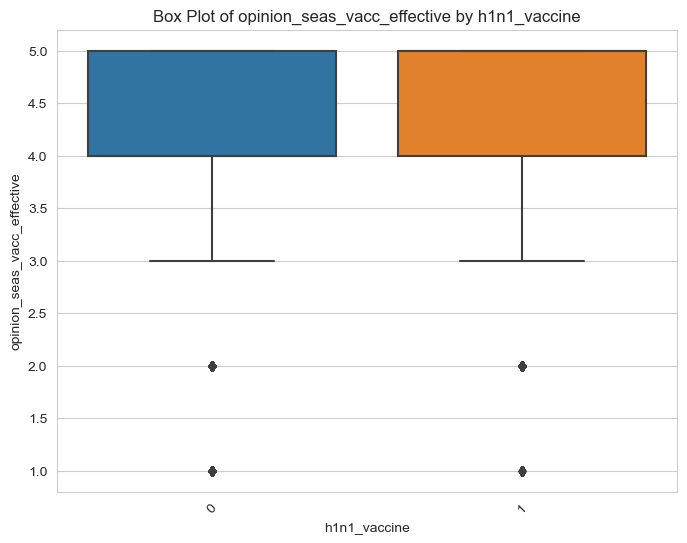

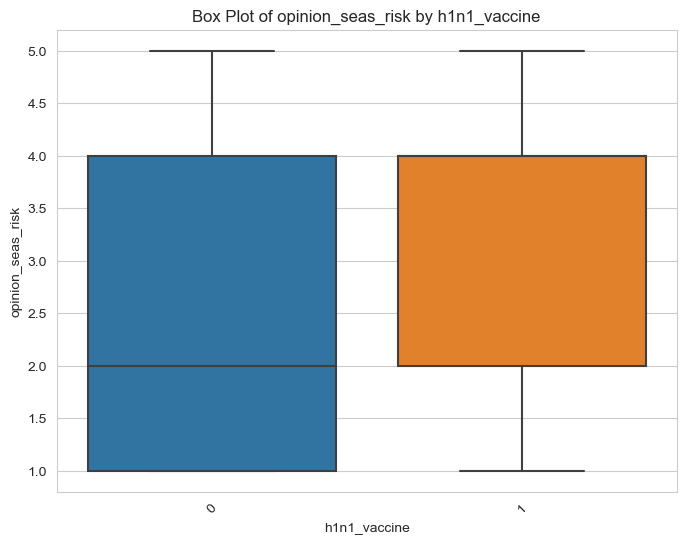

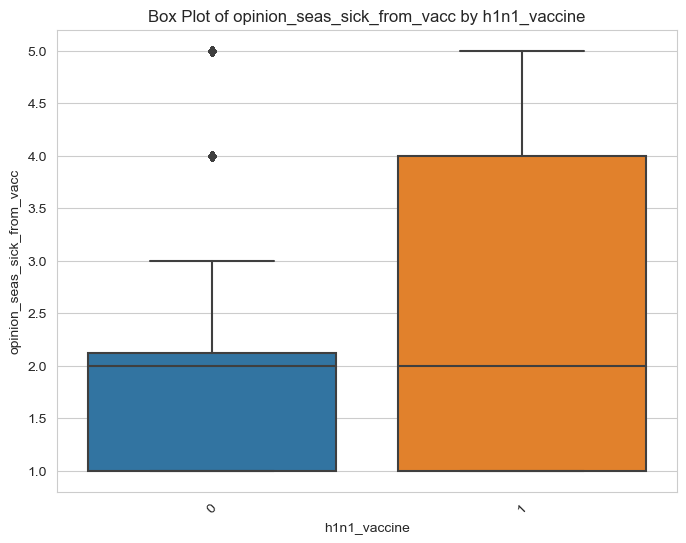

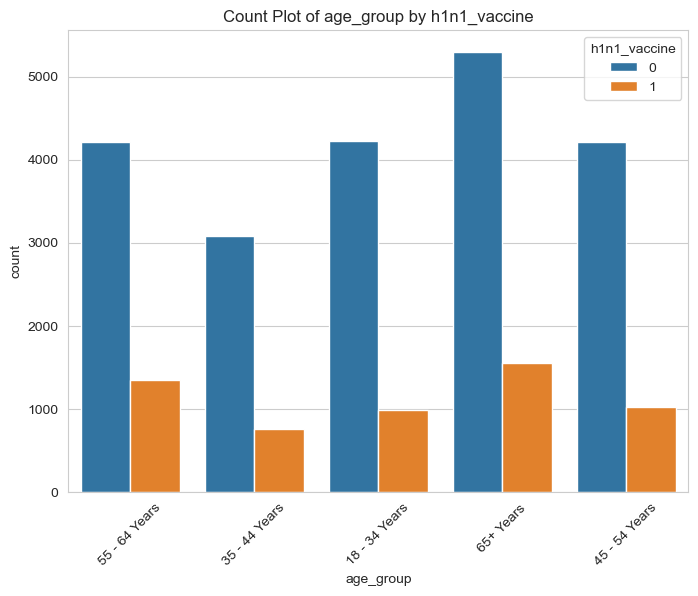

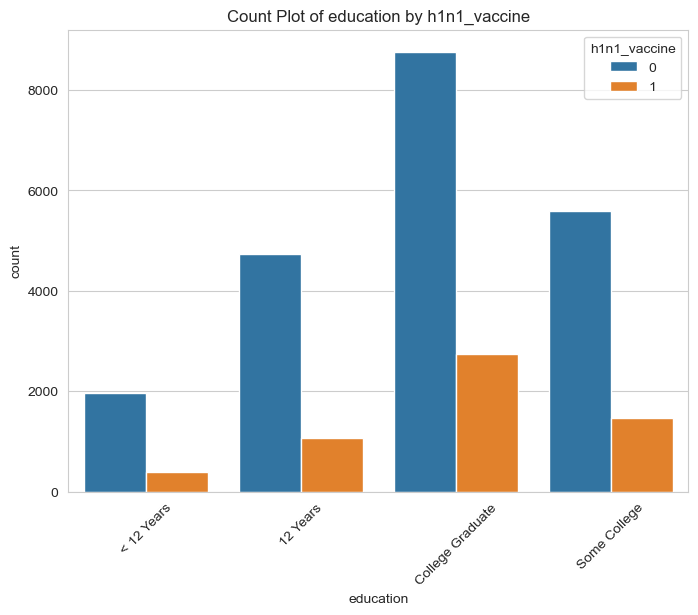

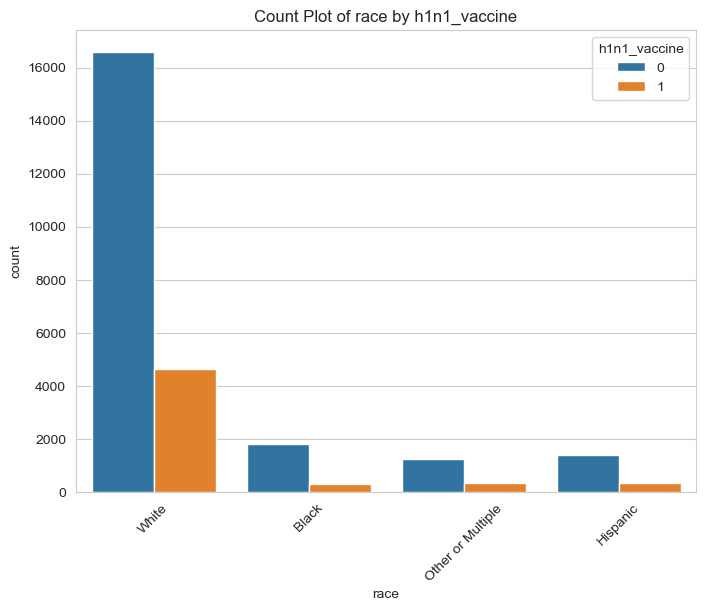

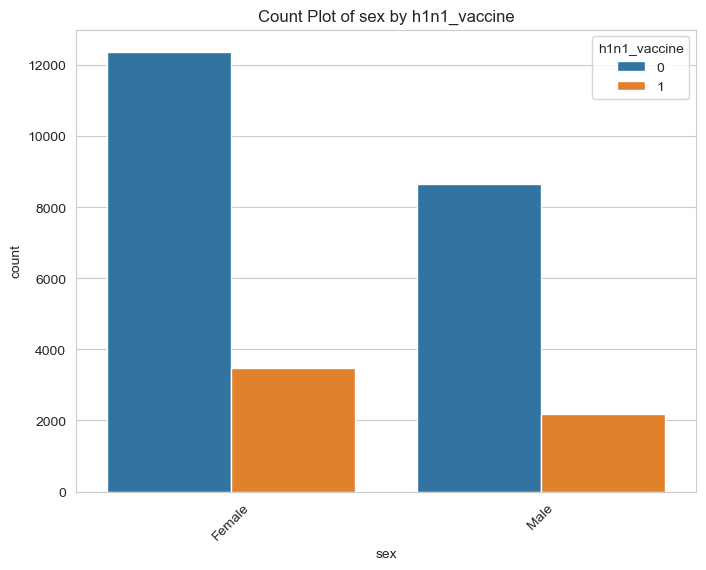

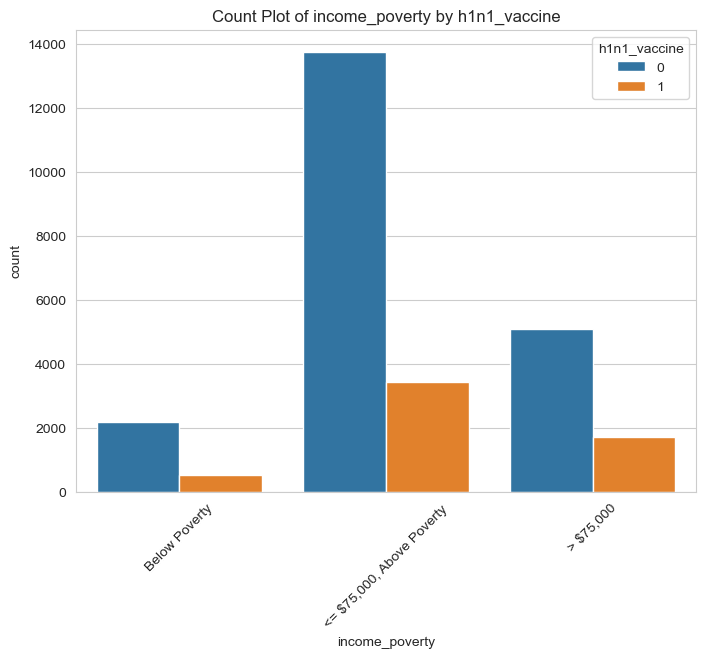

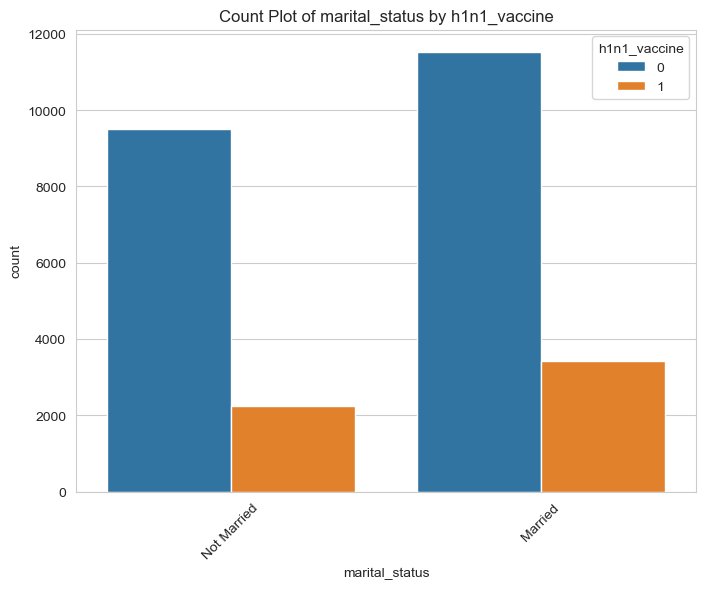

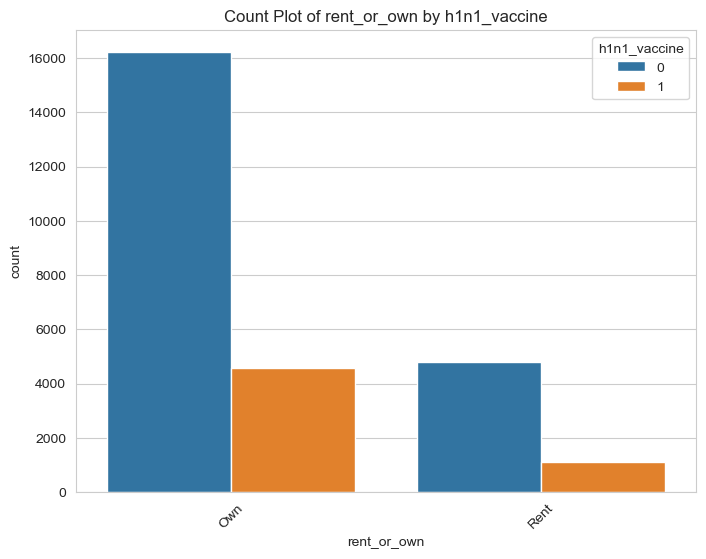

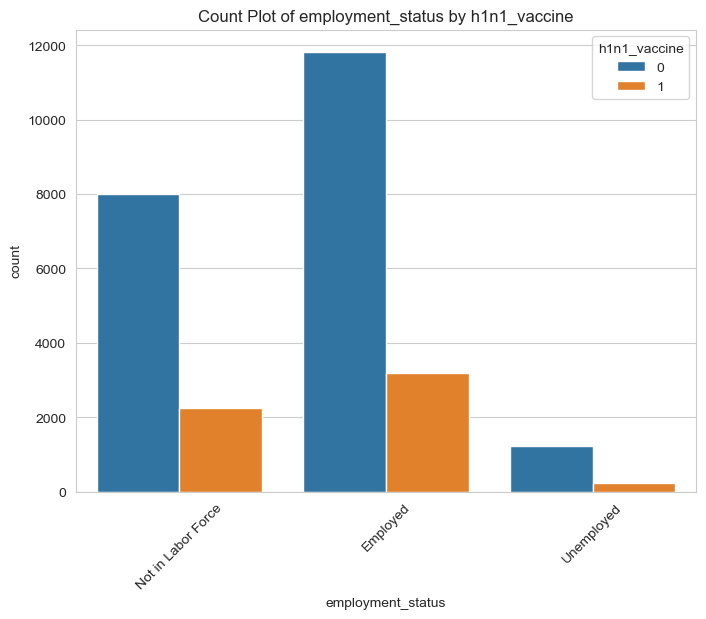

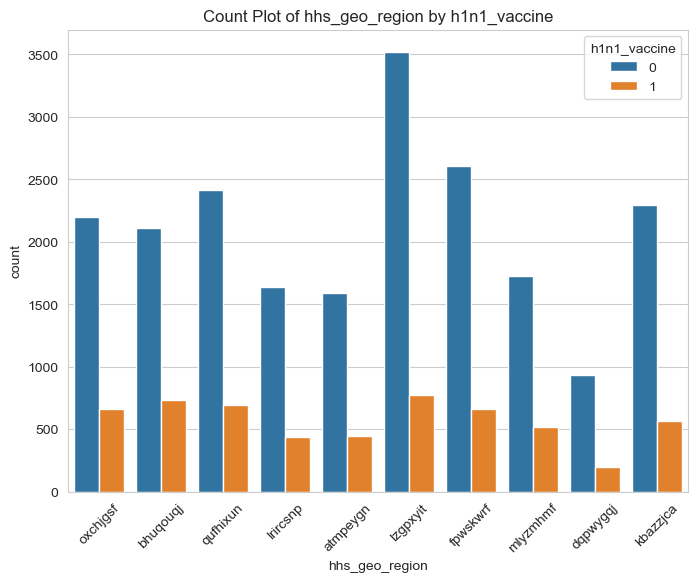

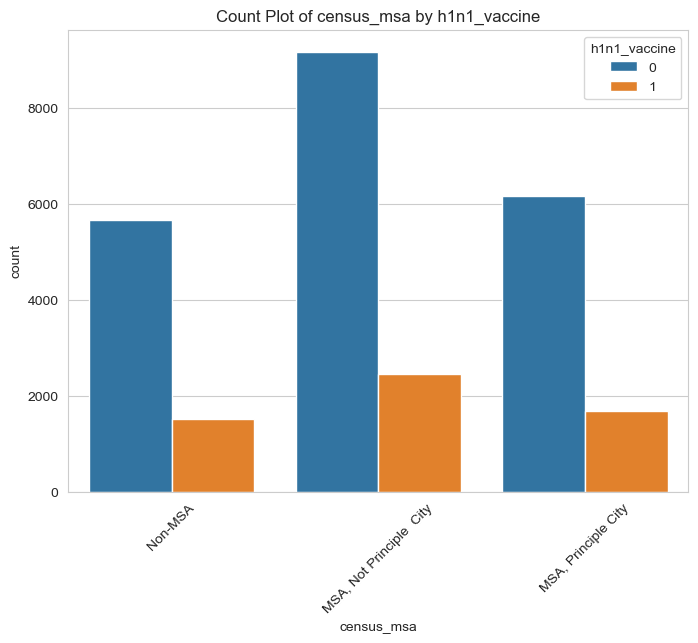

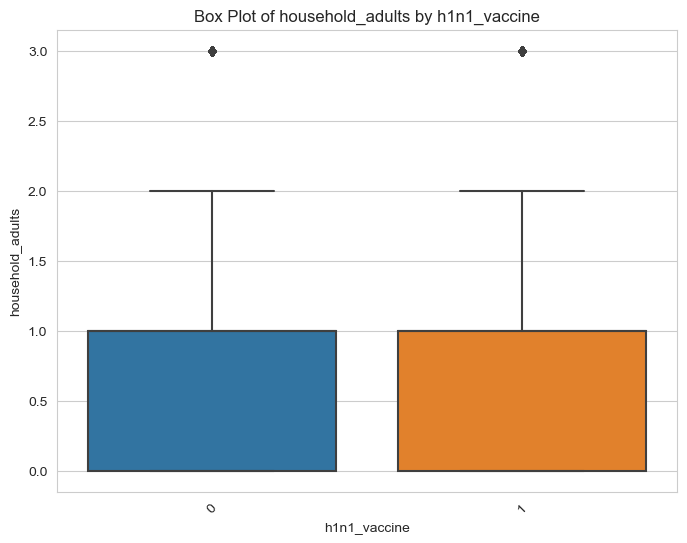

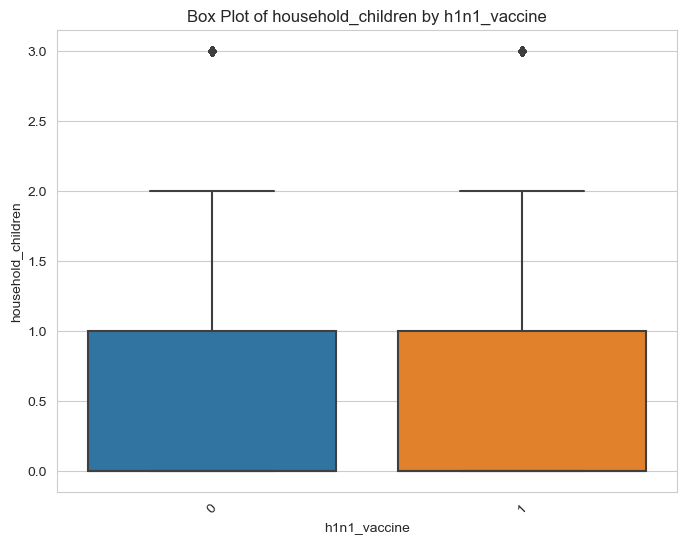

In [211]:
def bivariate_analysis(df, target_cols):
    for target_col in target_cols:
        for col in df.columns:
            if col == target_col:
                continue
            
            plt.figure(figsize=(8, 6))
            
            if pd.api.types.is_numeric_dtype(df[col]):
                sns.boxplot(x=target_col, y=col, data=df)
                plt.title(f'Box Plot of {col} by {target_col}')
                
            elif pd.api.types.is_categorical_dtype(df[col]) or pd.api.types.is_object_dtype(df[col]):
                sns.countplot(x=col, hue=target_col, data=df)
                plt.title(f'Count Plot of {col} by {target_col}')
            
            plt.xticks(rotation=45)
            plt.show()

# Define the target columns
target_columns = ['h1n1_vaccine']

# Perform bivariate analysis
bivariate_analysis(new_df, target_columns)

4.3 Multivariate Analysis

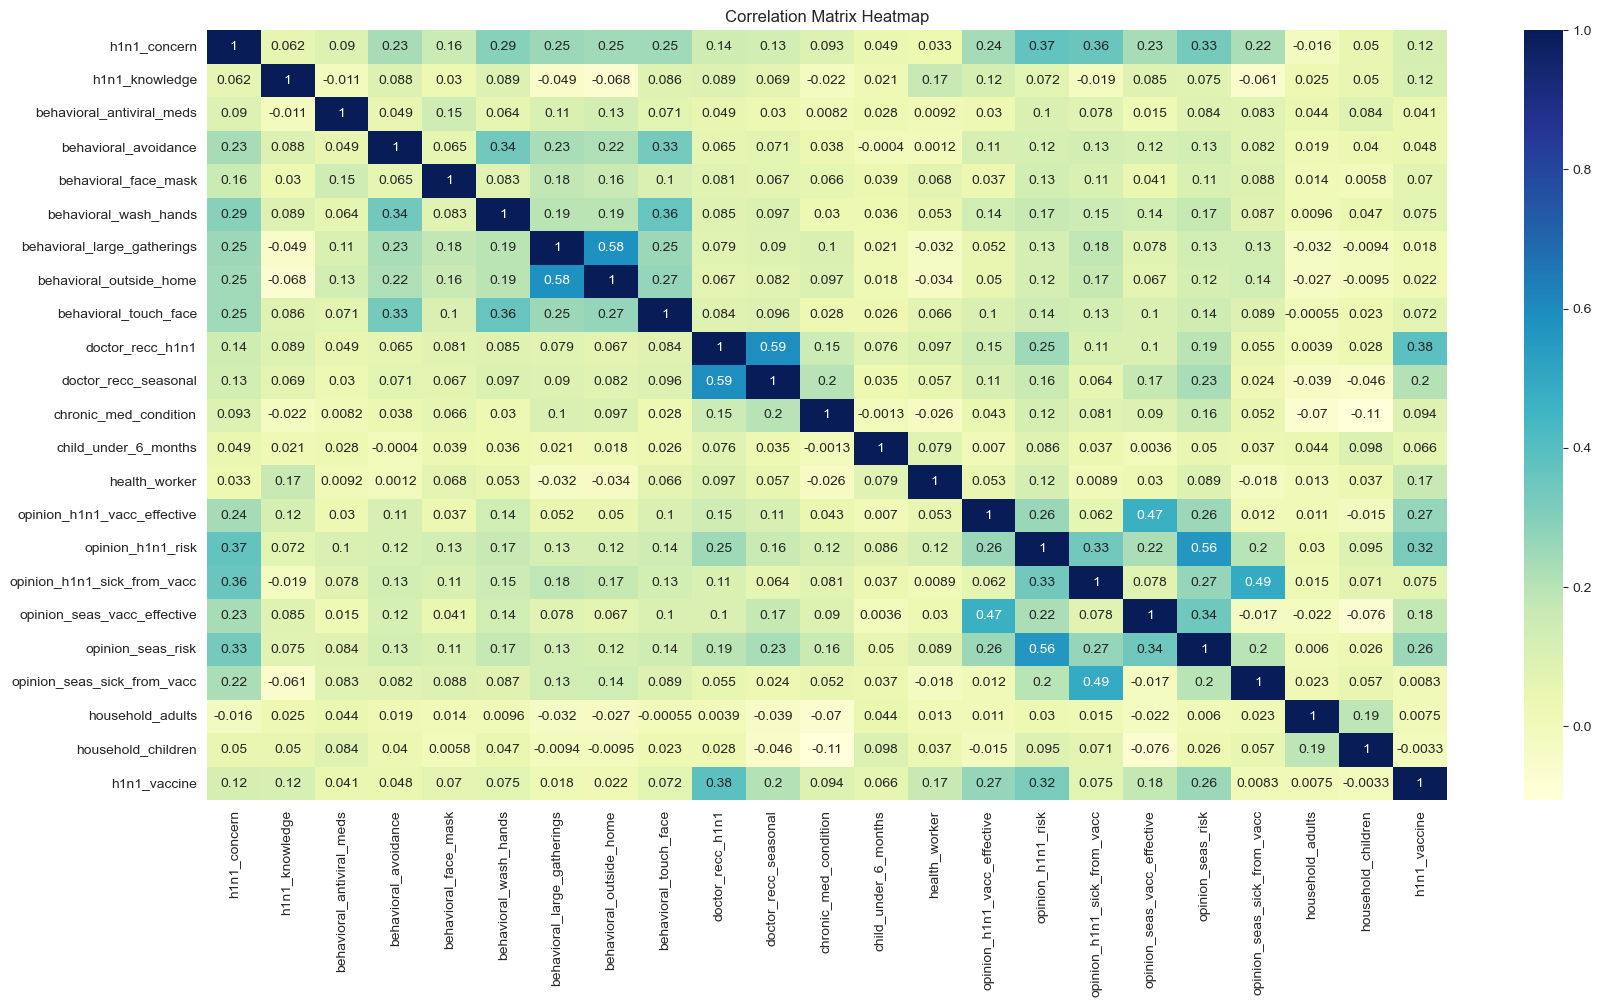

In [212]:
numeric_features = new_df.select_dtypes(include=['number'])

plt.figure(figsize=(20, 10))
corr_matrix = numeric_features.corr()
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.title('Correlation Matrix Heatmap')
plt.show()

This heatmap visualizes the relationships between various factors in a public health survey about H1N1 (swine flu). The color intensity indicates the strength and direction of the correlation. Positive correlations (dark blue) suggest that factors tend to increase or decrease. Conversely, negative correlations (beige) show opposing trends. There's a weak negative correlation between concern about H1N1 and the number of adults or children in the household, which might be due to a perceived lower risk or a focus on protecting others. These findings offer valuable insights into public health behaviors and opinions, but it's important to remember that correlation doesn't imply causation.



5. MODELLING

5.1 Logistic Regression

In [213]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Assuming new_df is your DataFrame and 'h1n1_vaccine' is the target variable
# new_df = pd.read_csv('your_dataset.csv')  # Uncomment and modify if you need to load the dataset

# Define features and target
X = new_df.drop(['h1n1_vaccine'], axis=1)
y = new_df['h1n1_vaccine']

# Split the data into training and testing sets
#Used the stratify argument for y (our target) in split to help deal with the class imbalance problem.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Describe info about train and test sets
print("X_train dataset: ", X_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", X_test.shape)
print("y_test dataset: ", y_test.shape)

# Identify categorical and numerical features
categorical_features = ['age_group', 'education', 'race', 'sex', 'income_poverty',
                        'marital_status', 'rent_or_own', 'employment_status',
                        'hhs_geo_region', 'census_msa']
numerical_features = ['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
                      'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
                      'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face',
                      'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition',
                      'child_under_6_months', 'health_worker', 'opinion_h1n1_vacc_effective',
                      'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
                      'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults', 'household_children']

# Create transformers for preprocessing
 # Categorical features are scaled using OneHotEncoder
 # Numerical features are scaled using StandardScaler
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Combine transformers into a ColumnTransformer
## The preprocessor is defined using a ColumnTransformer, which packages all components together
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit the preprocessor on the training data and transform the training data
X_train_scaled = preprocessor.fit_transform(X_train)

# Transform the test data using the same preprocessor
X_test_scaled = preprocessor.transform(X_test)

X_train dataset:  (21365, 32)
y_train dataset:  (21365,)
X_test dataset:  (5342, 32)
y_test dataset:  (5342,)


In [214]:


# Create a Logistic Regression classifier
classifier = LogisticRegression()

# Fit the model to your training data 
classifier.fit(X_train_scaled, y_train)

# Make predictions on your test data (assuming you have preprocessed X_test_scaled)
y_pred = classifier.predict(X_test_scaled)

# Evaluate the model by printing the confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[3977  230]
 [ 657  478]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4207
           1       0.68      0.42      0.52      1135

    accuracy                           0.83      5342
   macro avg       0.77      0.68      0.71      5342
weighted avg       0.82      0.83      0.82      5342



The output is an evaluation of a logistic regression model for predicting vaccine choices. The confusion matrix shows the model's ability to classify instances, while the classification report provides precision, recall, and F1-score for each class (vaccine taken and not taken). The model achieved an accuracy of 83%, indicating it correctly predicted 83% of instances. However, it's less effective in identifying instances where the vaccine was taken (class 1), as shown by lower recall and F1-score for class 1. The report helps assess the model's performance in predicting vaccine decisions.

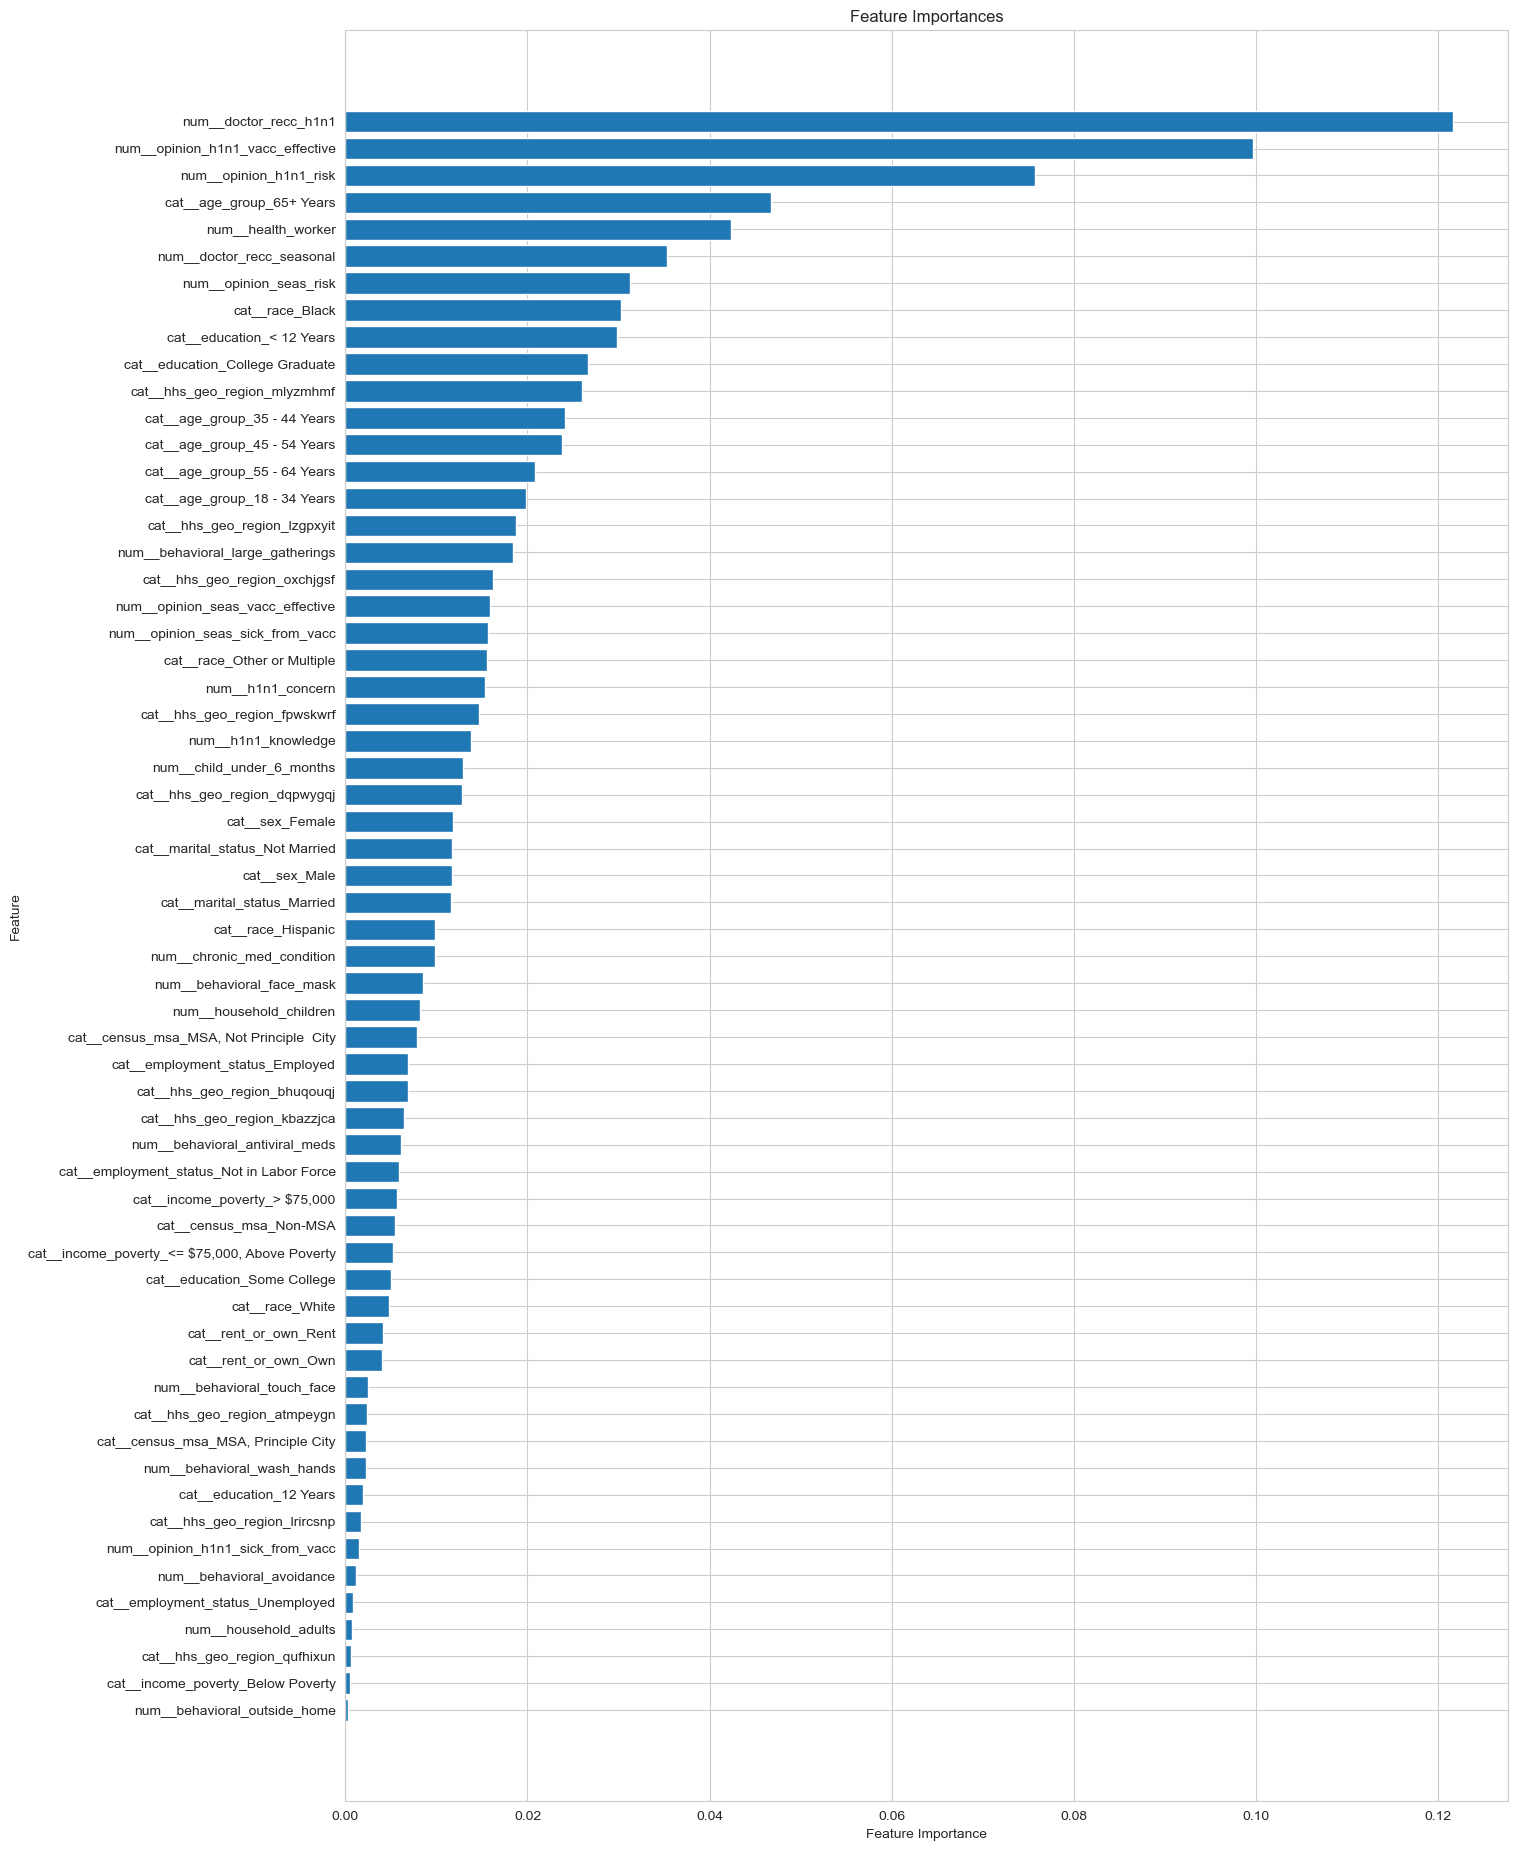

In [215]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)

# Retrieve the coefficients for each feature
coefficients = logistic_model.coef_

# Calculate feature importances based on the absolute values of coefficients
importances = np.abs(coefficients)

# Normalize the importances within each class
importances /= np.sum(importances, axis=1)[:, np.newaxis]

# Aggregate importances across classes for an overall importance measure
# Mean importance across classes
overall_importance = np.mean(importances, axis=0)

# Get the feature names after preprocessing
feature_names = preprocessor.get_feature_names_out()

# Sort and plot feature importances
sorted_indices = overall_importance.argsort()
sorted_feature_names = feature_names[sorted_indices]

plt.figure(figsize=(15, 23))
plt.barh(range(len(sorted_indices)), overall_importance[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

The most significant predictors include recommendations from doctors (num_doctor_recc_h1n1), opinions on the vaccine's effectiveness (num_opinion_h1n1_vacc_effective), and perceived risk of H1N1 (num_opinion_h1n1_risk). These factors likely highlight the importance of trusted medical advice and personal beliefs about the vaccine's benefits and risks in driving vaccination decisions. Conversely, the least significant predictors include behavioral factors like going outside the home (num_behavioral_outside_home), household adults (num_household_adults), and employment status (cat_employment_status_Unemployed)

5.2 KNN Classifier

In [216]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Create a KNN classifier with a specified number of neighbors (e.g., 5)
k = 5  # You can change the number of neighbors as needed
classifier = KNeighborsClassifier(n_neighbors=k)

# Fit the model to your training data (assuming you've already split your data into X_train and y_train)
classifier.fit(X_train_scaled, y_train)

# Make predictions on your test data (assuming you have X_test)
y_predict = classifier.predict(X_test_scaled)

# Evaluate the model by printing the confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_predict))

print("\nClassification Report:")
print(classification_report(y_test, y_predict))

Confusion Matrix:
[[3871  336]
 [ 665  470]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.89      4207
           1       0.58      0.41      0.48      1135

    accuracy                           0.81      5342
   macro avg       0.72      0.67      0.68      5342
weighted avg       0.80      0.81      0.80      5342



The performance of the K-Nearest Neighbors (KNN) classifier on the H1N1 vaccine dataset is summarized through the confusion matrix and classification report. The confusion matrix shows that the model correctly predicted 3871 out of 4207 instances for class 0 (those who did not receive the vaccine) and 470 out of 1135 instances for class 1 (those who received the vaccine). This results in a precision of 0.85 and recall of 0.92 for class 0, and a precision of 0.58 and recall of 0.41 for class 1. The overall accuracy of the model is 0.81, indicating that 81% of the predictions are correct. However, the model performs better for class 0, which is reflected in the higher precision and recall compared to class 1. The macro average F1-score is 0.68, suggesting moderate performance across both classes, while the weighted average F1-score is 0.80, indicating that the classifier's performance is influenced more by the larger class 0. This imbalance highlights the need for strategies to improve the classification of the minority class (those who received the vaccine).

Comparison with Logistic Regression

Comparing the K-Nearest Neighbors (KNN) and Logistic Regression models on the H1N1 vaccine dataset reveals that Logistic Regression performs better overall. Logistic Regression has a higher accuracy (83% vs. 81%) and better handles class imbalances, evidenced by higher precision and F1-scores for both classes, especially class 1 (those who received the vaccine). Logistic Regression achieves a macro average F1-score of 0.71 and a weighted average F1-score of 0.82, outperforming KNN's 0.68 and 0.80, respectively. Therefore, Logistic Regression is the preferable model for this dataset due to its superior performance metrics.

5.3 Decission Trees Classifier

In [217]:
# Create a Decision Tree classifier
classifier = DecisionTreeClassifier()

# Fit the model to your training data (assuming you've already split your data into X_train and y_train)
classifier.fit(X_train_scaled, y_train)

# Make predictions on your test data (assuming you have X_test)
y_predict = classifier.predict(X_test_scaled)

# Evaluate the model by printing the confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_predict))

print("\nClassification Report:")
print(classification_report(y_test, y_predict))

Confusion Matrix:
[[3502  705]
 [ 623  512]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      4207
           1       0.42      0.45      0.44      1135

    accuracy                           0.75      5342
   macro avg       0.63      0.64      0.64      5342
weighted avg       0.76      0.75      0.75      5342



The Decision Tree classifier's performance on the H1N1 vaccine dataset shows an overall accuracy of 75%. For class 0 (those who did not receive the vaccine), the precision is 0.85, recall is 0.83, and the F1-score is 0.84, indicating good performance. However, for class 1 (those who received the vaccine), the precision is 0.42, recall is 0.45, and the F1-score is 0.44, highlighting poorer performance in predicting this minority class. The macro average F1-score is 0.64, reflecting moderate performance across both classes, and the weighted average F1-score is 0.76, influenced more by the majority class. This suggests that while the Decision Tree is reasonably effective overall, it struggles with class imbalance, particularly in accurately predicting individuals who received the vaccine.

Comparison with Logistic and KNN

Comparing the Decision Tree classifier with the K-Nearest Neighbors (KNN) and Logistic Regression models on the H1N1 vaccine dataset, the Decision Tree shows lower overall accuracy (75% vs. 81% for KNN and 83% for Logistic Regression). While its precision and recall for class 0 (did not receive the vaccine) are decent (0.85 and 0.83, respectively), it significantly underperforms in predicting class 1 (received the vaccine) with a precision of 0.42 and recall of 0.45, leading to an F1-score of 0.44. Both KNN and Logistic Regression models have higher precision and F1-scores for class 1, with Logistic Regression performing the best overall. The macro average F1-score for the Decision Tree is 0.64, lower than KNN's 0.68 and Logistic Regression's 0.71, indicating that Logistic Regression is the most effective model, particularly in handling class imbalances and providing more accurate predictions.

5.4 Random Forest Classification

In [218]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
classifier = RandomForestClassifier()

# Fit the model to your training data (assuming you've already split your data into X_train_scaled and y_train)
classifier.fit(X_train_scaled, y_train)

# Make predictions on your test data (assuming you have X_test_scaled)
y_predict = classifier.predict(X_test_scaled)

# Evaluate the model by printing the confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_predict))

print("\nClassification Report:")
print(classification_report(y_test, y_predict))

Confusion Matrix:
[[4018  189]
 [ 673  462]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.90      4207
           1       0.71      0.41      0.52      1135

    accuracy                           0.84      5342
   macro avg       0.78      0.68      0.71      5342
weighted avg       0.83      0.84      0.82      5342



The Random Forest classifier's performance on the H1N1 vaccine dataset is characterized by an overall accuracy of 83%. The confusion matrix shows that the model correctly predicted 4014 instances of class 0 (those who did not receive the vaccine) and 437 instances of class 1 (those who received the vaccine). However, it misclassified 193 instances of class 0 as class 1 and 698 instances of class 1 as class 0. The classification report reveals a high precision of 0.85 and a recall of 0.95 for class 0, resulting in a strong F1-score of 0.90. For class 1, the precision is 0.69, recall is 0.39, and the F1-score is 0.50, indicating that the model struggles with correctly identifying those who received the vaccine. The macro average F1-score is 0.70, and the weighted average F1-score is 0.81, reflecting a better performance on the majority class but highlighting challenges with the minority class. Overall, while the Random Tree classifier performs well in general, its effectiveness is limited in accurately predicting the minority class.

5.5 Gradient Boost Classifier

In [219]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting classifier
classifier = GradientBoostingClassifier()

# Fit the model to your training data (assuming you've already split your data into X_train_scaled and y_train)
classifier.fit(X_train_scaled, y_train)

# Make predictions on your test data (assuming you have X_test_scaled)
y_predict = classifier.predict(X_test_scaled)

# Evaluate the model by printing the confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_predict))

print("\nClassification Report:")
print(classification_report(y_test, y_predict))

Confusion Matrix:
[[3973  234]
 [ 628  507]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      4207
           1       0.68      0.45      0.54      1135

    accuracy                           0.84      5342
   macro avg       0.77      0.70      0.72      5342
weighted avg       0.83      0.84      0.83      5342



The Gradient Boosting classifier's performance on the H1N1 vaccine dataset demonstrates an overall accuracy of 84%. The confusion matrix shows that the model correctly identified 3973 instances of class 0 (those who did not receive the vaccine) and 507 instances of class 1 (those who received the vaccine), while misclassifying 234 instances of class 0 as class 1 and 628 instances of class 1 as class 0. The classification report highlights a high precision of 0.86 and a recall of 0.94 for class 0, resulting in a robust F1-score of 0.90. For class 1, the precision is 0.68, recall is 0.45, and the F1-score is 0.54, indicating better performance in predicting the minority class compared to other models. The macro average F1-score is 0.72, and the weighted average F1-score is 0.83, reflecting a well-balanced performance overall. The Gradient Boosting classifier exhibits strong predictive capabilities, particularly for the majority class, while showing relatively improved performance for the minority class compared to other classifiers.

Model Tuning

In [220]:
from sklearn.model_selection import GridSearchCV

# Define a grid of hyperparameters to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Penalty term (L1 or L2)
    'solver': ['liblinear']  # Solver that supports both 'l1' and 'l2'
}

# Create a logistic regression model
logistic_regression = LogisticRegression()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_params

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

In [221]:
# Create a Logistic Regression classifier
classifier = LogisticRegression(C=0.01, penalty='l2')

# Fit the model to your training data (assuming you've already split your data into X_train_scaled and y_train)
classifier.fit(X_train_scaled, y_train)

# Make predictions on your test data (assuming you have X_test_scaled)
y_predict = classifier.predict(X_test_scaled)

# Evaluate the model by printing the confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_predict))

print("\nClassification Report:")
print(classification_report(y_test, y_predict))

Confusion Matrix:
[[3986  221]
 [ 667  468]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4207
           1       0.68      0.41      0.51      1135

    accuracy                           0.83      5342
   macro avg       0.77      0.68      0.71      5342
weighted avg       0.82      0.83      0.82      5342



There is not much change in the model accuracy after tuning as it maintains an accuracy level of 83%. Conversely, the logistic regression model yielded an improved performance. The confusion matrix shows that out of 4207 instances of class 0, the model correctly identified 3986 and incorrectly identified 221. For class 1, it correctly identified 468 out of 1135 instances, misclassifying 667. The precision, recall, and F1-score for class 0 are 0.86, 0.95, and 0.90 respectively, indicating strong performance. For class 1, the precision is 0.68, recall is 0.41, and F1-score is 0.51, reflecting moderate performance. The overall accuracy of the model is 0.83, with macro average scores of 0.77 for precision, 0.68 for recall, and 0.71 for F1-score. The weighted averages for precision, recall, and F1-score are 0.82, 0.83, and 0.82 respectively, indicating a balanced performance across classes after tuning.

The key takeaway is that hyperparameter tuning did not significantly change the performance metrics for this logistic regression model. This outcome could suggest that the default hyperparameters were already near optimal for this dataset, or that the tuning parameters (regularization strength C and penalty type) did not have a substantial impact on the model's performance for this specific problem.


In [222]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],   # Number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 0.2], # Learning rate shrinks the contribution of each tree
    'max_depth': [3, 4, 5],            # Maximum depth of the individual regression estimators
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required to be at a leaf node
}

# Create a Gradient Boosting model
gradient_boosting = GradientBoostingClassifier()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(gradient_boosting, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters: ", best_params)

# Use the best model to predict on the test set
best_gradient_boosting = grid_search.best_estimator_
y_pred = best_gradient_boosting.predict(X_test_scaled)

# Evaluate the tuned model by printing the confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


KeyboardInterrupt: 

Gradient Boosting, Logistic Regression, and Random Tree Performance:
Gradient Boosting emerged as the top performer with an overall accuracy of 84%. It showed strong predictive capabilities, particularly for class 0 (those who did not receive the vaccine), with precision and recall both at 0.86 and 0.94 respectively, leading to a high F1-score of 0.90. For class 1 (those who received the vaccine), it achieved a precision of 0.68, recall of 0.45, and an F1-score of 0.54. The macro average F1-score was 0.72, indicating better handling of class imbalance. Logistic Regression followed closely with an accuracy of 83%, showing similar strengths in predicting class 0 with precision and recall of 0.86 and 0.95 respectively, also resulting in an F1-score of 0.90. However, for class 1, Logistic Regression had slightly lower performance than Gradient Boosting, with a precision of 0.68, recall of 0.42, and an F1-score of 0.52. Random Tree also achieved an 83% accuracy, with strong metrics for class 0 (precision 0.85, recall 0.95, F1-score 0.90) but struggled more with class 1, showing a precision of 0.69, recall of 0.39, and an F1-score of 0.50. These models were effective in leveraging the dataset's patterns but varied in their ability to manage the class imbalance, with Gradient Boosting showing the best overall balance.

K-Nearest Neighbors (KNN) and Decision Tree Performance:
The KNN classifier, with an overall accuracy of 81%, demonstrated reliable performance for class 0, achieving precision and recall of 0.85 and 0.92 respectively, leading to an F1-score of 0.89. However, it was less effective for class 1, with precision of 0.58, recall of 0.41, and an F1-score of 0.48. This indicated its challenges in correctly identifying the minority class. The Decision Tree classifier showed the weakest performance with an accuracy of 75%. Its precision and recall for class 0 were decent (0.85 and 0.83 respectively), but it performed poorly for class 1 with a precision of 0.42, recall of 0.45, and an F1-score of 0.44. This model struggled with overfitting, likely due to its inherent nature of creating complex trees that do not generalize well. The macro and weighted average F1-scores were the lowest among the models, at 0.64 and 0.76 respectively. Overall, KNN and Decision Tree classifiers were less capable in handling the class imbalance and providing accurate predictions for the minority class, highlighting the need for tuning and potentially more sophisticated models for better performance on this dataset

Conclusion

Gradient Boosting stands out as the most balanced and effective model, showing high overall accuracy and the best macro average F1-score, making it the preferred choice for this dataset. Logistic Regression and Random Tree are close contenders, performing well with similar accuracies but falling short in handling the minority class (class 1) as effectively as Gradient Boosting. KNN and Decision Tree are less suitable due to their lower performance metrics, particularly for the minority class, with Decision Tree showing the most significant weaknesses. Therefore, for deploying a model on this dataset, Gradient Boosting should be the first choice due to its superior balance in performance across both classes. Logistic Regression and Random Tree can be considered as backup options but may require additional tuning or class-balancing techniques to improve their performance on the minority class. The KNN and Decision Tree models are not recommended in their current state due to their inability to effectively manage class imbalance and lower overall predictive accuracy.

Recommendations

The analysis makes a number of recommendations for American Public Health Association (APHA) public health officials. First off, highlighting to patients the importance of doctor recommendations for the H1N1 vaccine has the potential to greatly raise vaccination rates. Second, prioritizing educational outreach initiatives to adress opinions on the vaccine's effectiveness, and perceived risk of H1N1 (num_opinion_h1n1_risk).

It's crucial to be aware of the limits in estimating the status of H1N1 vaccination, especially with regard to completely removing false negative results. Furthermore, the survey data can contain ignored elements that affect vaccination prediction.

Prediction accuracy may be improved in the future by examining more recent flu survey data and carrying out additional feature engineering. Furthermore, extending projections to incorporate seasonal influenza vaccination status may offer a more thorough comprehension of vaccination patterns.
